/home/vscode/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


This is the image we are querying for


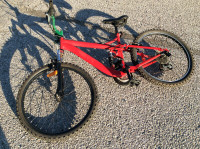

../data/images/1579572448.jpg
Cosine Similarity Score: tensor([[1.0000]])


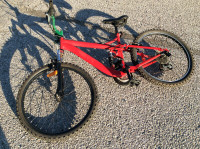

../data/images/1579572448.jpg
Cosine Similarity Score: tensor([[0.8375]])


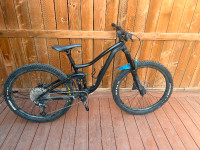

../data/images/1579572448.jpg
Cosine Similarity Score: tensor([[0.8652]])


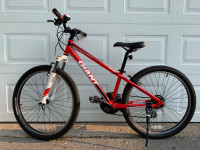

../data/images/1579572448.jpg
Cosine Similarity Score: tensor([[0.6172]])


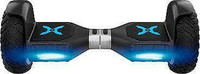

In [1]:
from sentence_transformers import SentenceTransformer, util
from PIL import Image
from IPython.display import Image as IPyImage
from IPython.display import display

#Load CLIP model
model = SentenceTransformer('clip-ViT-B-32')

query = ['1579572448.jpg']
images = ['1579572448.jpg', '1663626291.jpg', '1663624649.jpg', '1505809858.jpg']

print('This is the image we are querying for')
display(IPyImage(filename=f'../data/images/{query[0]}'))

for image in images:
    print(f'../data/images/{query[0]}')
    query_emb = model.encode(Image.open(f'../data/images/{query[0]}'))
    img_emb = model.encode(Image.open(f'../data/images/{image}'))

    #Compute cosine similarities 
    cos_scores = util.cos_sim(query_emb, img_emb)
    print(f'Cosine Similarity Score: {cos_scores}')
    display(IPyImage(filename=f'../data/images/{image}'))


In [1]:
import os
import pinecone

# get api key from app.pinecone.io
PINECONE_API_KEY = '75c794bc-4feb-4358-8ab8-5ccccb91dc88' 
# os.environ.get('PINECONE_API_KEY')
# find your environment next to the api key in pinecone console
PINECONE_ENV = 'us-east-1-aws'
# os.environ.get('PINECONE_ENVIRONMENT')

pinecone.init(
    api_key=PINECONE_API_KEY,
    environment=PINECONE_ENV
)

index = pinecone.Index('cycle-saviours')

/home/vscode/.local/lib/python3.10/site-packages/pinecone/index.py:4: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


In [5]:
import json
# Specify the file path of the JSON file
file_path = "../data/bike-index.json"

# Read the JSON file
with open(file_path, 'r') as json_file:
    data = json.load(json_file)

# Print the loaded data
metadata_list = data['metadata']

In [6]:
from sentence_transformers import SentenceTransformer, util
from PIL import Image
import os

filenames = os.listdir('../data/bike_index_images/')

#Load CLIP model
model = SentenceTransformer('clip-ViT-B-32')

i = 0
upserts = []
for idx, metadata in enumerate(metadata_list):

    embedding = model.encode(Image.open(f'../data/bike_index_images/{metadata["source_id"]}.jpg')).tolist()

    upserts.append({
        'id': str(i),
        'values': embedding,
        'metadata': metadata
    })    
    
    i += 1
    if i % 500 == 0:
        index.upsert(upserts)
        print('Upserted batch')
        upserts = []

# this will index last few documents when i % 1000 != 0
if len(upserts) > 0:
    index.upsert(upserts)
    print('Upserted final batch')


Upserted batch
Upserted batch
Upserted batch
Upserted batch
Upserted batch
Upserted batch
Upserted final batch


In [2]:
from sentence_transformers import SentenceTransformer, util
from PIL import Image

#Load CLIP model
model = SentenceTransformer('clip-ViT-B-32')

query_embedding = model.encode(Image.open(f'../data/bike_index_images/33978.jpg')).tolist()

print('test')
response = index.query(query_embedding, top_k=25, include_metadata=True)

response

test


{'matches': [{'id': '3318',
              'metadata': {'ad_description': '',
                           'ad_link': 'https://bikeindex.org/bikes/33978',
                           'ad_location': 'calgary',
                           'ad_title': '1997 Specialized Rockhopper Comp FS',
                           'brand': 'Specialized',
                           'color': 'Blue',
                           'image_link': 'https://files.bikeindex.org/uploads/Pu/15631/small_2014-09-22_13.44.45.jpg',
                           'list_date': datetime.datetime(2014, 10, 27, 6, 0),
                           'model': 'Rockhopper Comp FS',
                           'source': 'Bike Index',
                           'source_id': '33978'},
              'score': 1.00000012,
              'values': []},
             {'id': '3215',
              'metadata': {'ad_description': 'Black gel seat, straight bars, '
                                             'rear rack ',
                           'ad_link

In [11]:
index.upsert([upserts[1]])

{'upserted_count': 1}

In [ ]:
index_name = 'semantic-search'

# only create index if it doesn't exist
if index_name not in pinecone.list_indexes():
    pinecone.create_index(
        name=index_name,
        dimension=model.get_sentence_embedding_dimension(),
        metric='cosine'
    )

# now connect to the index
index = pinecone.GRPCIndex(index_name)

In [ ]:
from azure.storage.blob import BlobServiceClient
from azure.identity import DefaultAzureCredential

def upload_csv_to_blob_storage(csv_file_path, container_name, blob_name):

    credential = DefaultAzureCredential()

    # Create a BlobServiceClient using the default Azure credentials
    blob_service_client = BlobServiceClient(
            account_url="https://<my_account_name>.blob.core.windows.net",
            credential=credential)
            
    # Get a reference to the container
    container_client = blob_service_client.get_container_client(container_name)

    # Upload the CSV file to the blob storage
    with open(csv_file_path, "rb") as data:
        container_client.upload_blob(name=blob_name, data=data)

# Usage
csv_file_path = "path_to_csv_file.csv"
container_name = "your_container_name"
blob_name = "your_blob_name.csv"

upload_csv_to_blob_storage(csv_file_path, container_name, blob_name)


from azure.identity import DefaultAzureCredential
from azure.storage.blob import BlobServiceClient

# Acquire a credential object
credential = DefaultAzureCredential()

blob_service_client = BlobServiceClient(
        account_url="https://<my_account_name>.blob.core.windows.net",
        credential=credential)